**Chapter 10-3 – Introduction to Artificial Neural Networks with Keras**

Homework notebook

### 학번: 20201581

### 이름: 김형성

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.7 is required
import sys
print("Python: ", sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.8.0 is required
import tensorflow as tf
print("TF version: ", tf.__version__)
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# GPU check
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# GPU check
if not "google.colab" in sys.modules: 
    from tensorflow.python.client import device_lib
    print("============")
    print('Device Test')
    print("============")
    print(device_lib.list_local_devices()[0])
    print(device_lib.list_local_devices()[1])

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Where to save the figures
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Python:  sys.version_info(major=3, minor=9, micro=21, releaselevel='final', serial=0)
1.2.2
TF version:  2.10.0
Default GPU Device: /device:GPU:0
Device Test
name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4336482417900583924
xla_global_id: -1

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14211350528
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15601393363618015123
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419



In [2]:
#import keras
from tensorflow import keras
keras.__version__

'2.10.0'

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42, test_size=0.2)

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

## Building Complex Models Using the Functional API

In [4]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
# Higher version
#model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
#              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
465/465 [==============================] - 2s 3ms/step - loss: 1.7247 - dense_2_loss: 1.6730 - dense_3_loss: 2.1907 - dense_2_root_mean_squared_error: 1.2934 - dense_3_root_mean_squared_error: 1.4801 - val_loss: 0.6290 - val_dense_2_loss: 0.5992 - val_dense_3_loss: 0.8971 - val_dense_2_root_mean_squared_error: 0.7741 - val_dense_3_root_mean_squared_error: 0.9472
Epoch 2/20
465/465 [==============================] - 1s 3ms/step - loss: 0.5276 - dense_2_loss: 0.5021 - dense_3_loss: 0.7566 - dense_2_root_mean_squared_error: 0.7086 - dense_3_root_mean_squared_error: 0.8698 - val_loss: 0.4771 - val_dense_2_loss: 0.4619 - val_dense_3_loss: 0.6138 - val_dense_2_root_mean_squared_error: 0.6796 - val_dense_3_root_mean_squared_error: 0.7834
Epoch 3/20
465/465 [==============================] - 1s 3ms/step - loss: 0.4365 - dense_2_loss: 0.4200 - dense_3_loss: 0.5854 - dense_2_root_mean_squared_error: 0.6481 - dense_3_root_mean_squared_error: 0.7651 - val_loss: 0.4344 - val_dense_2_loss

In [5]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
print(eval_results)
weighted_sum_of_rmse = eval_results[3]*0.9 + eval_results[4]*0.1
print("weighted_sum_of_rmses: ", weighted_sum_of_rmse)
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

65/65 [==============================] - 0s 2ms/step - loss: 0.3578 - dense_2_loss: 0.3524 - dense_3_loss: 0.4064 - dense_2_root_mean_squared_error: 0.5936 - dense_3_root_mean_squared_error: 0.6375
[0.3577599823474884, 0.35235825181007385, 0.40637466311454773, 0.5935977101325989, 0.6374751925468445]
weighted_sum_of_rmses:  0.5979854583740235
1/1 [==============================] - 0s 56ms/step


In [6]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model1 = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model1.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
# Higher version
#model1.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
#              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model1.norm_layer_wide.adapt(X_train_wide)
model1.norm_layer_deep.adapt(X_train_deep)
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
print("\nEvaluating...")
eval_results1 = model1.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model1.predict((X_new_wide, X_new_deep))
print(eval_results1)
weighted_sum_of_rmse1 = eval_results1[3]*0.9 + eval_results1[4]*0.1
#Higher version
#weighted_sum_of_rmse = eval_results1[1]*0.9 + eval_results1[5]*0.1
print("weighted_sum_of_rmses: ", weighted_sum_of_rmse1)

Epoch 1/10
465/465 [==============================] - 2s 4ms/step - loss: 1.1607 - output_1_loss: 1.0963 - output_2_loss: 1.7405 - output_1_root_mean_squared_error: 1.0470 - output_2_root_mean_squared_error: 1.3193 - val_loss: 0.5530 - val_output_1_loss: 0.5194 - val_output_2_loss: 0.8554 - val_output_1_root_mean_squared_error: 0.7207 - val_output_2_root_mean_squared_error: 0.9249
Epoch 2/10
465/465 [==============================] - 2s 3ms/step - loss: 0.4833 - output_1_loss: 0.4525 - output_2_loss: 0.7607 - output_1_root_mean_squared_error: 0.6727 - output_2_root_mean_squared_error: 0.8722 - val_loss: 0.4477 - val_output_1_loss: 0.4270 - val_output_2_loss: 0.6337 - val_output_1_root_mean_squared_error: 0.6535 - val_output_2_root_mean_squared_error: 0.7961
Epoch 3/10
465/465 [==============================] - 2s 3ms/step - loss: 0.4282 - output_1_loss: 0.4083 - output_2_loss: 0.6077 - output_1_root_mean_squared_error: 0.6390 - output_2_root_mean_squared_error: 0.7795 - val_loss: 0.427

# Saving and Restoring

In [8]:
# extra code – delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)
shutil.rmtree("my_keras_model1", ignore_errors=True)

In [9]:
# 모델 저장 직전에 추가
# 모델 호출하여 입력 형태 정의 
model.predict((X_new_wide, X_new_deep))
model.save("my_keras_model", save_format="tf")

# 모델1 호출하여 입력 형태 정의
model1.predict((X_new_wide, X_new_deep)) 
model1.save("my_keras_model1", save_format="tf")
# Higher version
#model.export("my_keras_model")
#model1.export("my_keras_model1")

1/1 [==============================] - 0s 25ms/step
INFO:tensorflow:Assets written to: my_keras_model\assets
1/1 [==============================] - 0s 12ms/step
INFO:tensorflow:Assets written to: my_keras_model1\assets


In [10]:
# extra code – show the contents of the my_keras_model/ directory. TF2.8 only
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model\assets
my_keras_model\keras_metadata.pb
my_keras_model\saved_model.pb
my_keras_model\variables
my_keras_model\variables\variables.data-00000-of-00001
my_keras_model\variables\variables.index


In [11]:
model2 = tf.keras.models.load_model("my_keras_model")
model3 = tf.keras.models.load_model("my_keras_model1")
y_pred_main, y_pred_aux = model3.predict((X_new_wide, X_new_deep))
#Higher version
#tfsm_layer = tf.keras.layers.TFSMLayer("my_keras_model1")
#y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 39ms/step


In [12]:
model.save_weights("my_weights")
model1.save_weights("my_weights")
#HIgher version
#model.save_weights("my_weights.weights.h5")
#model1.save_weights("my_weights1.weights.h5")

In [13]:
model.load_weights("my_weights")
model1.load_weights("my_weights")
#HIgher version
#model.load_weights("my_weights.weights.h5")
#model1.load_weights("my_weights1.weights.h5")

For higher versions, to save a model using the `.keras` format, simply use `model.save()`:

In [14]:
#Higher version
#model.save("my_model.keras")
#model1.save("my_model1.keras")

For higher versions, to load a `.keras` model, use the `tf.keras.models.load_model()` function. If the model uses any custom object, you must pass them to the function via the `custom_objects` argument:

In [15]:
#loaded_model = tf.keras.models.load_model("my_model.keras")
#loaded_model1 = tf.keras.models.load_model(
#    "my_model1.keras",
#    custom_objects={"WideAndDeepModel": WideAndDeepModel}
#)

In [16]:
# extra code – show the list of my_weights.* files
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


### ==P1. Saving and Restoring==
#### model1와 model3 (또는 loaded_model1)에 대해 X_test_wide, X_test_deep의 입력을 이용하여 evaluate 결과를 구하여 원래의 값과 비교하시오.
#### Answer.
- 서로 다른 객체임에도 불구하고 정확히 똑같은 값을 나타내었다.
- 평가 결과 비교:
  - 총 손실(Loss): 원본 모델 0.3763 = 로드된 모델 0.3763 (차이: 0.0)
  - 주 출력 손실(Main output loss): 원본 모델 0.3697 = 로드된 모델 0.3697 (차이: 0.0)
  - 보조 출력 손실(Aux output loss): 원본 모델 0.4362 = 로드된 모델 0.4362 (차이: 0.0)
  - 주 출력 RMSE: 원본 모델 0.6080 = 로드된 모델 0.6080 (차이: 0.0)
  - 보조 출력 RMSE: 원본 모델 0.6604 = 로드된 모델 0.6604 (차이: 0.0)
- 이는 TensorFlow의 모델 저장 및 로드 기능이 모델의 구조와 가중치를 정확하게 보존함을 증명한다.
- 추가 테스트에서도 서로 다른 객체이며(model1 is model3: False), 수정된 입력에 대해서도 동일한 예측을 수행하는 것을 확인했다.

In [17]:
# 원래 모델(model1) 평가
print("Original model evaluation:")
eval_results1 = model1.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
print("Original model - Loss:", eval_results1[0])
print("Original model - Main output loss:", eval_results1[1])
print("Original model - Aux output loss:", eval_results1[2])
print("Original model - Main output RMSE:", eval_results1[3])
print("Original model - Aux output RMSE:", eval_results1[4])

# 불러온 모델(model3) 평가
print("\nLoaded model evaluation:")
eval_results3 = model3.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
print("Loaded model - Loss:", eval_results3[0])
print("Loaded model - Main output loss:", eval_results3[1])
print("Loaded model - Aux output loss:", eval_results3[2])
print("Loaded model - Main output RMSE:", eval_results3[3])
print("Loaded model - Aux output RMSE:", eval_results3[4])

# 결과 비교
print("\nComparison:")
print("Total loss difference:", abs(eval_results1[0] - eval_results3[0]))
print("Main output loss difference:", abs(eval_results1[1] - eval_results3[1]))
print("Aux output loss difference:", abs(eval_results1[2] - eval_results3[2]))
print("Main output RMSE difference:", abs(eval_results1[3] - eval_results3[3]))
print("Aux output RMSE difference:", abs(eval_results1[4] - eval_results3[4]))

Original model evaluation:
65/65 [==============================] - 0s 2ms/step - loss: 0.3794 - output_1_loss: 0.3719 - output_2_loss: 0.4463 - output_1_root_mean_squared_error: 0.6099 - output_2_root_mean_squared_error: 0.6681
Original model - Loss: 0.3793811798095703
Original model - Main output loss: 0.37194573879241943
Original model - Aux output loss: 0.44629985094070435
Original model - Main output RMSE: 0.6098735332489014
Original model - Aux output RMSE: 0.6680567860603333

Loaded model evaluation:
65/65 [==============================] - 0s 2ms/step - loss: 0.3794 - output_1_loss: 0.3719 - output_2_loss: 0.4463 - output_1_root_mean_squared_error: 0.6099 - output_2_root_mean_squared_error: 0.6681
Loaded model - Loss: 0.3793811798095703
Loaded model - Main output loss: 0.37194573879241943
Loaded model - Aux output loss: 0.44629985094070435
Loaded model - Main output RMSE: 0.6098735332489014
Loaded model - Aux output RMSE: 0.6680567860603333

Comparison:
Total loss difference: 0

In [18]:
# 모델 구분을 위해 서로 다른 예측을 하는지 확인
print("Models are the same object:", model1 is model3)  # False여야 함

# 약간 다른 입력으로 두 모델의 출력 비교
import numpy as np
X_test_modified = X_test_wide.copy()
if X_test_modified.shape[0] > 0:
    X_test_modified[0, 0] += 0.01  # 첫 번째 샘플의 첫 번째 특성 약간 수정
    
# 원본 모델과 로드된 모델이 수정된 입력에 대해 동일하게 반응하는지 확인
y_pred1_mod, _ = model1.predict((X_test_modified[:1], X_test_deep[:1]))
y_pred3_mod, _ = model3.predict((X_test_modified[:1], X_test_deep[:1]))
print("Modified input predictions:")
print("Original model:", y_pred1_mod)
print("Loaded model:", y_pred3_mod)
print("Difference:", np.abs(y_pred1_mod - y_pred3_mod).mean())

Models are the same object: False
1/1 [==============================] - 0s 11ms/step
Modified input predictions:
Original model: [[0.4683363]]
Loaded model: [[0.4683363]]
Difference: 0.0


## Using Callbacks during Training

In [19]:
shutil.rmtree("my_checkpoints1", ignore_errors=True)  # extra code

In [20]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints1",save_weights_only=True)
# Higher version
#checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints1.weights.h5",save_weights_only=True)
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
465/465 [==============================] - 2s 4ms/step - loss: 0.3451 - output_1_loss: 0.3370 - output_2_loss: 0.4185 - output_1_root_mean_squared_error: 0.5805 - output_2_root_mean_squared_error: 0.6470 - val_loss: 0.3808 - val_output_1_loss: 0.3739 - val_output_2_loss: 0.4431 - val_output_1_root_mean_squared_error: 0.6115 - val_output_2_root_mean_squared_error: 0.6656
Epoch 2/10
465/465 [==============================] - 2s 4ms/step - loss: 0.3411 - output_1_loss: 0.3327 - output_2_loss: 0.4169 - output_1_root_mean_squared_error: 0.5768 - output_2_root_mean_squared_error: 0.6457 - val_loss: 0.3683 - val_output_1_loss: 0.3630 - val_output_2_loss: 0.4159 - val_output_1_root_mean_squared_error: 0.6025 - val_output_2_root_mean_squared_error: 0.6449
Epoch 3/10
465/465 [==============================] - 2s 4ms/step - loss: 0.3520 - output_1_loss: 0.3447 - output_2_loss: 0.4181 - output_1_root_mean_squared_error: 0.5871 - output_2_root_mean_squared_error: 0.6466 - val_loss: 0.348

In [21]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3214 - output_1_loss: 0.3147 - output_2_loss: 0.3821 - output_1_root_mean_squared_error: 0.5609 - output_2_root_mean_squared_error: 0.6182 - val_loss: 0.3433 - val_output_1_loss: 0.3376 - val_output_2_loss: 0.3940 - val_output_1_root_mean_squared_error: 0.5811 - val_output_2_root_mean_squared_error: 0.6277
Epoch 2/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3209 - output_1_loss: 0.3142 - output_2_loss: 0.3812 - output_1_root_mean_squared_error: 0.5605 - output_2_root_mean_squared_error: 0.6175 - val_loss: 0.3398 - val_output_1_loss: 0.3334 - val_output_2_loss: 0.3982 - val_output_1_root_mean_squared_error: 0.5774 - val_output_2_root_mean_squared_error: 0.6311
Epoch 3/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3311 - output_1_loss: 0.3240 - output_2_loss: 0.3948 - output_1_root_mean_squared_error: 0.5692 - output_2_root_mean_squared_error: 0.6283 - val_loss: 0.

In [22]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [23]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.10
Epoch=1, val/train=1.10
Epoch=2, val/train=1.09
Epoch=3, val/train=1.12
Epoch=4, val/train=1.09
Epoch=5, val/train=1.10
Epoch=6, val/train=1.09
Epoch=7, val/train=1.08
Epoch=8, val/train=1.11
Epoch=9, val/train=1.11


## Using TensorBoard for Visualization

TensorBoard is preinstalled on Colab, but not the `tensorboard-plugin-profile`, so let's install it:

In [35]:
# 기존 TensorBoard 프로세스 종료 (Windows)
!taskkill /F /PID 17472

����: ���μ��� "17472"��(��) ã�� �� �����ϴ�.


In [36]:
if "google.colab" in sys.modules:  # extra code
    %pip install -q -U tensorboard-plugin-profile

In [37]:
shutil.rmtree("my_logs", ignore_errors=True)

In [38]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [39]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [40]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
465/465 [==============================] - 2s 3ms/step - loss: 1.7783 - root_mean_squared_error: 1.3335 - val_loss: 0.8389 - val_root_mean_squared_error: 0.9159
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: 0.7267 - root_mean_squared_error: 0.8525 - val_loss: 0.6542 - val_root_mean_squared_error: 0.8088
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: 0.6302 - root_mean_squared_error: 0.7938 - val_loss: 0.6213 - val_root_mean_squared_error: 0.7882
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: 0.6026 - root_mean_squared_error: 0.7763 - val_loss: 0.5973 - val_root_mean_squared_error: 0.7729
Epoch 5/20
465/465 [==============================] - 1s 2ms/step - loss: 0.5787 - root_mean_squared_error: 0.7607 - val_loss: 0.5783 - val_root_mean_squared_error: 0.7605
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: 0.5606 - root_mean_squared_error: 0.7487 - val_loss: 0.5602 - val_

In [41]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2025_03_30_20_58_31
    events.out.tfevents.1743335913.CRONG.profile-empty
    plugins
      profile
        2025_03_30_11_58_33
          CRONG.input_pipeline.pb
          CRONG.kernel_stats.pb
          CRONG.memory_profile.json.gz
          CRONG.overview_page.pb
          CRONG.tensorflow_stats.pb
          CRONG.trace.json.gz
          CRONG.xplane.pb
    train
      events.out.tfevents.1743335912.CRONG.25432.4.v2
    validation
      events.out.tfevents.1743335914.CRONG.25432.5.v2


In [42]:
run_logdir2 = get_run_logdir()
run_logdir2

WindowsPath('my_logs/run_2025_03_30_20_58_52')

In [43]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=2e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [44]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/20
465/465 [==============================] - 1s 2ms/step - loss: 1.4021 - root_mean_squared_error: 1.1841 - val_loss: 0.7190 - val_root_mean_squared_error: 0.8479
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: 0.6588 - root_mean_squared_error: 0.8117 - val_loss: 0.6021 - val_root_mean_squared_error: 0.7760
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: 0.5717 - root_mean_squared_error: 0.7561 - val_loss: 0.5474 - val_root_mean_squared_error: 0.7399
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: 0.5202 - root_mean_squared_error: 0.7213 - val_loss: 0.5120 - val_root_mean_squared_error: 0.7155
Epoch 5/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4892 - root_mean_squared_error: 0.6994 - val_loss: 0.4953 - val_root_mean_squared_error: 0.7037
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4760 - root_mean_squared_error: 0.6899 - val_loss: 0.4728 - val_

In [48]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs/
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 23360), started 0:00:07 ago. (Use '!kill 23360' to kill it.)

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

## ### ==P2. Tensorboard==
 #### 위의 tensorboard에서 한쌍의 train/validation만 선택하고 smoothing slider를 왼쪽으로 움직여 최소값으로 한후 변화를 관찰한다.
 #### loss와 rmse값의 변화를 관찰하고 학습결과를 분석하시오
 #### Answer:

Smoothing을 최소화하고 관찰한 결과:

1. **Loss 변화**: 
   - 초기에 급격히 감소하다가 5 에포크 이후부터 완만하게 감소한다.
   - Validation loss는 0.67에서 시작해 20 에포크에서 0.44까지 낮아진다.

2. **RMSE 변화**:
   - 초기 RMSE는 0.82에서 시작하여 꾸준히 감소한다.
   - 20 에포크에서는 0.66까지 낮아진다.

3. **Train과 Validation 비교**:
   - 두 곡선이 유사한 패턴으로 감소하며 큰 격차가 없다.
   - 이는 모델이 과적합 없이 잘 일반화되고 있음을 보여준다.

4. **Smoothing 효과**:
   - Smoothing을 0으로 설정해도 곡선이 부드럽다.
   - 이는 학습이 안정적으로 진행되었음을 의미한다.

In [49]:
# extra code

if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))
    
# Copy the url below, and paste it on a new tab    

You can use also visualize histograms, images, text, and even listen to audio using TensorBoard:

In [50]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

When you stop this Jupyter kernel (a.k.a. Runtime), it will automatically stop the TensorBoard server as well. Another way to stop the TensorBoard server is to kill it, if you are running on Linux or MacOSX. First, you need to find its process ID:

In [51]:
# extra code – lists all running TensorBoard server instances

from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6007: logdir ./my_logs (started 4:44:36 ago; pid 16756)
  - port 6006: logdir ./my_logs (started 1 day, 1:48:34 ago; pid 17472)
  - port 6006: logdir ./my_logs/ (started 0:06:13 ago; pid 23360)


# Fine-Tuning Neural Network Hyperparameters

In this section we'll use the Fashion MNIST dataset again:

In [63]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [66]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [61]:
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

In [67]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [68]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 37s]
val_accuracy: 0.8392000198364258

Best val_accuracy So Far: 0.859000027179718
Total elapsed time: 00h 03m 16s


In [69]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [70]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [71]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.859000027179718


In [72]:
best_trial.metrics.get_last_value("val_accuracy")

0.859000027179718

In [73]:
best_model.fit(X_train_full, y_train_full, validation_data=(X_valid, y_valid), epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.8790 - val_loss: 0.3899 - val_accuracy: 0.8606
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.8823 - val_loss: 0.3626 - val_accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3106 - accuracy: 0.8864 - val_loss: 0.3301 - val_accuracy: 0.8720
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3017 - accuracy: 0.8900 - val_loss: 0.3301 - val_accuracy: 0.8800
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8904 - val_loss: 0.3249 - val_accuracy: 0.8762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2894 - accuracy: 0.8928 - val_loss: 0.3035 - val_accuracy: 0.8856
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2820 - accuracy: 0.8960 - val_loss: 0.3039 - val_accuracy:

### ==P3. Random Search==
#### 1. 위에서 random search의 seed를 변경하여 search를 진행후 best model의 hyperparameter와 score를 찾아 seed=42인 경우와 비교하시오
#### 2. seed=42일 때, max_trials=10으로 변경하여 best model의 hyperparameter와 score를 비교하시오

In [74]:
# P3.1 코드: 다른 seed 값으로 random search 실행
random_search_tuner1 = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search1", seed=100)  # seed 값을 42에서 100으로 변경
random_search_tuner1.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

# 최적의 하이퍼파라미터 확인
top3_params1 = random_search_tuner1.get_best_hyperparameters(num_trials=1)
print("Best hyperparameters (seed=100):", top3_params1[0].values)
best_trial1 = random_search_tuner1.oracle.get_best_trials(num_trials=1)[0]
print("Best score (seed=100):", best_trial1.metrics.get_last_value("val_accuracy"))

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.8551999926567078

Best val_accuracy So Far: 0.8705999851226807
Total elapsed time: 00h 03m 00s
Best hyperparameters (seed=100): {'n_hidden': 8, 'n_neurons': 227, 'learning_rate': 0.0026385629878377535, 'optimizer': 'sgd'}
Best score (seed=100): 0.8705999851226807


In [75]:
# 기존 결과(seed=42)의 최적 하이퍼파라미터 확인
top3_params_original = random_search_tuner.get_best_hyperparameters(num_trials=1)
print("Best hyperparameters (seed=42):", top3_params_original[0].values)
best_trial_original = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
print("Best score (seed=42):", best_trial_original.metrics.get_last_value("val_accuracy"))

# 이제 모든 결과를 한번에 비교
print("\n=== 비교 결과 ===")
print("seed=42 (원래 결과):")
print("  - 최적 하이퍼파라미터:", top3_params_original[0].values)
print("  - 최고 점수:", best_trial_original.metrics.get_last_value("val_accuracy"))
print("\nseed=100 (새로운 결과):")
print("  - 최적 하이퍼파라미터:", top3_params1[0].values)
print("  - 최고 점수:", best_trial1.metrics.get_last_value("val_accuracy"))

Best hyperparameters (seed=42): {'n_hidden': 7, 'n_neurons': 100, 'learning_rate': 0.0012482904754698163, 'optimizer': 'sgd'}
Best score (seed=42): 0.859000027179718

=== 비교 결과 ===
seed=42 (원래 결과):
  - 최적 하이퍼파라미터: {'n_hidden': 7, 'n_neurons': 100, 'learning_rate': 0.0012482904754698163, 'optimizer': 'sgd'}
  - 최고 점수: 0.859000027179718

seed=100 (새로운 결과):
  - 최적 하이퍼파라미터: {'n_hidden': 8, 'n_neurons': 227, 'learning_rate': 0.0026385629878377535, 'optimizer': 'sgd'}
  - 최고 점수: 0.8705999851226807


In [76]:
# P3.2 코드: max_trials=10으로 변경
random_search_tuner2 = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=10, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search2", seed=42)  # max_trials를 10으로 변경
random_search_tuner2.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

# 최적의 하이퍼파라미터 확인
top3_params2 = random_search_tuner2.get_best_hyperparameters(num_trials=1)
print("Best hyperparameters (max_trials=10):", top3_params2[0].values)
best_trial2 = random_search_tuner2.oracle.get_best_trials(num_trials=1)[0]
print("Best score (max_trials=10):", best_trial2.metrics.get_last_value("val_accuracy"))

Trial 10 Complete [00h 00m 46s]
val_accuracy: 0.8700000047683716

Best val_accuracy So Far: 0.8795999884605408
Total elapsed time: 00h 06m 46s
Best hyperparameters (max_trials=10): {'n_hidden': 7, 'n_neurons': 124, 'learning_rate': 0.0005509513888645584, 'optimizer': 'adam'}
Best score (max_trials=10): 0.8795999884605408


In [77]:
# 기존 결과(seed=42, max_trials=5)의 최적 하이퍼파라미터 확인
top3_params_original = random_search_tuner.get_best_hyperparameters(num_trials=1)
best_trial_original = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]

# 모든 결과를 표 형태로 비교
print("\n=== 하이퍼파라미터 탐색 결과 비교 ===")
print(f"{'설정':^20}|{'최적 하이퍼파라미터':^60}|{'최고 점수':^15}")
print("-" * 100)
print(f"seed=42, trials=5  | {top3_params_original[0].values} | {best_trial_original.metrics.get_last_value('val_accuracy'):.6f}")
print(f"seed=100, trials=5 | {top3_params1[0].values} | {best_trial1.metrics.get_last_value('val_accuracy'):.6f}")
print(f"seed=42, trials=10 | {top3_params2[0].values} | {best_trial2.metrics.get_last_value('val_accuracy'):.6f}")


=== 하이퍼파라미터 탐색 결과 비교 ===
         설정         |                         최적 하이퍼파라미터                         |     최고 점수     
----------------------------------------------------------------------------------------------------
seed=42, trials=5  | {'n_hidden': 7, 'n_neurons': 100, 'learning_rate': 0.0012482904754698163, 'optimizer': 'sgd'} | 0.859000
seed=100, trials=5 | {'n_hidden': 8, 'n_neurons': 227, 'learning_rate': 0.0026385629878377535, 'optimizer': 'sgd'} | 0.870600
seed=42, trials=10 | {'n_hidden': 7, 'n_neurons': 124, 'learning_rate': 0.0005509513888645584, 'optimizer': 'adam'} | 0.879600


### P3 결과 비교 분석
#### 1. 시드 변경 효과 (seed=42 vs seed=100, trials=5 유지):
    - 시드 변경만으로도 최적 하이퍼파라미터가 크게 달라짐
    - 정확도가 0.859에서 0.870으로 약 1.1% 향상됨
    - 뉴런 수가 100에서 227로 증가, 은닉층 수는 7에서 8로 증가

#### 2. 탐색 횟수 증가 효과 (max_trials=5 vs max_trials=10, seed=42 유지):
    - 탐색 횟수 증가로 정확도가 0.859에서 0.879로 약 2% 향상됨
    - 최적 하이퍼파라미터의 뉴런 수가 100에서 124로 증가
    - 옵티마이저가 sgd에서 adam으로 변경됨

#### 3. 종합 분석:
    - 탐색 횟수 증가가 시드 변경보다 더 큰 성능 향상을 가져옴
    - 최적의 결과는 seed=42, trials=10 설정에서 얻어짐(정확도 0.879)
    - 학습률은 전반적으로 낮은 값(0.0005~0.002)이 선호됨
    - 은닉층의 수는 7~8개로 비슷하게 유지됨

#### P2 결과비교 
#### Answer:
seed=42, max_trials=5: #기존



seed=100 , max_trials=5: #P3.1



seed=42, max_trials=10: #P3.2


In [78]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [79]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [80]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 51s]
val_accuracy: 0.8507999777793884

Best val_accuracy So Far: 0.8817999958992004
Total elapsed time: 00h 17m 44s


In [81]:
%tensorboard --logdir={root_logdir}

In [82]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 54s]
val_accuracy: 0.8338000178337097

Best val_accuracy So Far: 0.8586000204086304
Total elapsed time: 00h 09m 27s


### Exercise 10.4
아래의 파라미터를 갖는 fully-connected network에 대해 다음 물음에 답하시오  
Number of input features: Nf  
Number of neurons in ith hidden nodes: Nni  
Number of hidden layers: Nh  
Number of output node: No  

1. MAC(multiply and addition) operation의 수를 위에서 주어진 파라미터를 이용하여 식으로 표현하시오. 단, Nh=3이다.  
2. 위의 코드중 Reggression MLP의 california housing dataset에 대해 Nh=3, Nn1=Nn2=Nn3=30일 때 30 epoch 동안 학습후 loss, val_loss, mse_test값을 구하시오. Hyperparameter는 Regression MLP의 실습 코드와 같은 값을 이용한다. Tensorboard를 위해 log10 directory에 get_log_dir 함수를 이용하여 subdirectory를 생성하시오.   
3. Nh=2일 때 MAC operation 수가 최대한 비슷하도록 Nn1=Nn2를 구하고 2와 같은 조건으로 학습시키고 step당 학습시간, training loss와 test accuracy를 구하시오.
4. Nh=1일 때 MAC operation 수가 최대한 비슷하도록 Nn1을 구하고 2와 같은 조건으로 학습시키고 step당 학습시간, training loss와 test accuracy를 구하시오.  
5. 2-4번의 결과를 비교하고 분석하시오. 또한 Tensorboard에서 learning curve를 비교하시오.

1.
MAC 연산 수 = Nf × Nn1 + Nn1 × Nn2 + Nn2 × Nn3 + Nn3 × No

In [83]:
# 데이터 준비
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# 로그 디렉토리 설정
run_logdir = get_run_logdir("log10")

# Nh=3, Nn=30 모델 구축
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model3.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
history = model3.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

mse_test = model3.evaluate(X_test, y_test)
print("Test MSE:", mse_test[0])
print("Test RMSE:", mse_test[1])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.8806 - root_mean_squared_error: 1.3714 - val_loss: 1.4489 - val_root_mean_squared_error: 1.2037
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7557 - root_mean_squared_error: 0.8693 - val_loss: 0.7680 - val_root_mean_squared_error: 0.8764
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6595 - root_mean_squared_error: 0.8121 - val_loss: 0.6209 - val_root_mean_squared_error: 0.7880
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6057 - root_mean_squared_error: 0.7783 - val_loss: 0.5792 - val_root_mean_squared_error: 0.7610
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5648 - root_mean_squared_error: 0.7516 - val_loss: 0.5206 - val_root_mean_squared_error: 0.7215
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5271 - root_mean_squared_error: 0.7260 - val_loss: 0.4929 - val_

In [84]:
# Nh=2, Nn=41 모델
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
run_logdir = get_run_logdir("log10")

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(41, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(41, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model2.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
history = model2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

mse_test = model2.evaluate(X_test, y_test)
print("Test MSE:", mse_test[0])
print("Test RMSE:", mse_test[1])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.9714 - root_mean_squared_error: 1.4041 - val_loss: 0.8087 - val_root_mean_squared_error: 0.8993
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7355 - root_mean_squared_error: 0.8576 - val_loss: 0.6806 - val_root_mean_squared_error: 0.8250
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6565 - root_mean_squared_error: 0.8102 - val_loss: 0.6319 - val_root_mean_squared_error: 0.7949
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6112 - root_mean_squared_error: 0.7818 - val_loss: 0.5655 - val_root_mean_squared_error: 0.7520
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5746 - root_mean_squared_error: 0.7580 - val_loss: 0.5334 - val_root_mean_squared_error: 0.7303
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5421 - root_mean_squared_error: 0.7363 - val_loss: 0.5023 - val_

In [85]:
#4
# number of MAC operation for 1 hidden layers : 
# 8 x n + n x 1 = 2070 -> n = 230
# Nh=1, Nn=230 모델
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
run_logdir = get_run_logdir("log10")

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(230, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model1.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
history = model1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

mse_test = model1.evaluate(X_test, y_test)
print("Test MSE:", mse_test[0])
print("Test RMSE:", mse_test[1])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8719 - root_mean_squared_error: 1.3682 - val_loss: 0.9685 - val_root_mean_squared_error: 0.9841
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7270 - root_mean_squared_error: 0.8526 - val_loss: 0.6904 - val_root_mean_squared_error: 0.8309
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6602 - root_mean_squared_error: 0.8125 - val_loss: 0.6333 - val_root_mean_squared_error: 0.7958
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6205 - root_mean_squared_error: 0.7877 - val_loss: 0.5967 - val_root_mean_squared_error: 0.7724
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5875 - root_mean_squared_error: 0.7665 - val_loss: 0.5579 - val_root_mean_squared_error: 0.7469
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5579 - root_mean_squared_error: 0.7469 - val_loss: 0.5173 - val_

In [86]:
%tensorboard --logdir=./my_logs --port=6006

# Exercise solutions

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [89]:
# MNIST 데이터셋 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
mnist = keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist

11490434/11490434 [==============================] - 1s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [91]:
print(X_train_full.shape)  # 출력: (60000, 28, 28)

(60000, 28, 28)


Each pixel intensity is also represented as a byte (0 to 255):

In [90]:
print(X_train_full.dtype)  # 출력: uint8 (부호 없는 8비트 정수)
print(X_train_full.min(), X_train_full.max())  # 출력: 0 255

uint8
0 255


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [92]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

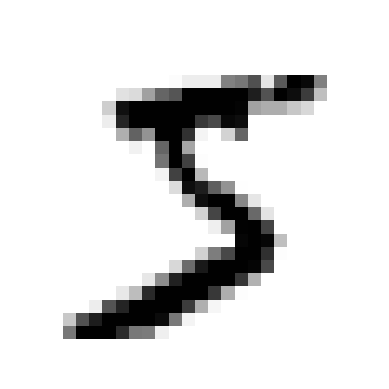

In [94]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [93]:
# 레이블 확인
print(y_train[0])  # 첫 번째 훈련 이미지의 레이블 출력
print(y_train[:10])  # 처음 10개 이미지의 레이블 확인

5
[5 0 4 1 9 2 1 3 1 4]


The validation set contains 5,000 images, and the test set contains 10,000 images:

In [95]:
# 검증 세트 크기 확인
print("검증 세트 크기:", X_valid.shape, y_valid.shape)

검증 세트 크기: (5000, 28, 28) (5000,)


In [96]:
# 테스트 세트 크기 확인
print("테스트 세트 크기:", X_test.shape, y_test.shape)

테스트 세트 크기: (10000, 28, 28) (10000,)


Let's take a look at a sample of the images in the dataset:

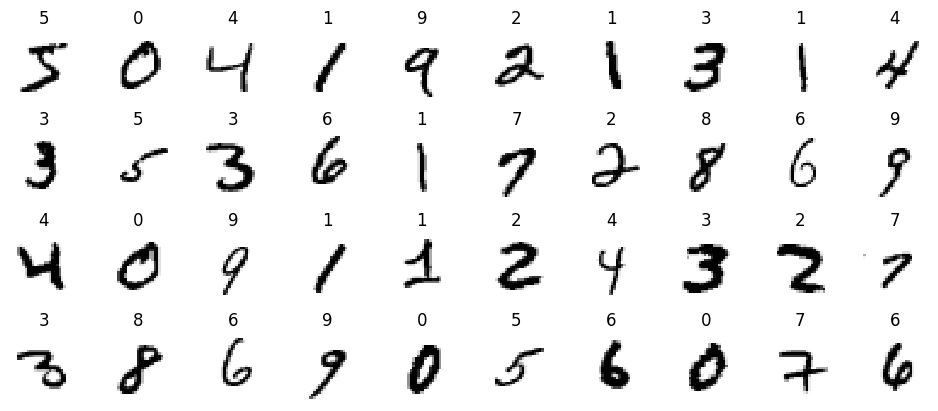

In [97]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [99]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [100]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [102]:
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [103]:
history = model.fit(X_train, y_train, epochs=1,
                   validation_data=(X_valid, y_valid),
                   callbacks=[expon_lr])

1719/1719 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.5002 - val_loss: nan - val_accuracy: 0.0978


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

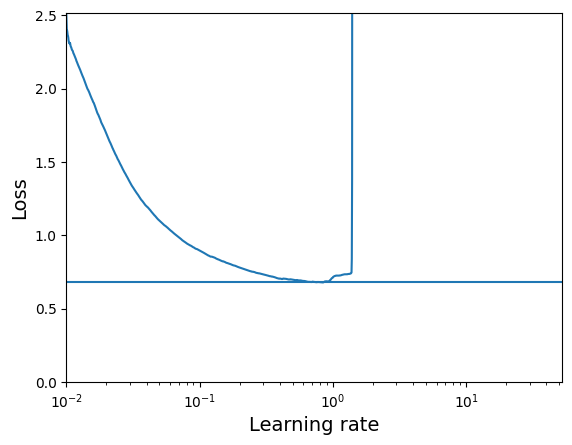

In [104]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently around 3e-1, so let's try using 2e-1 as our learning rate:

In [105]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=2e-1)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [110]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [111]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(
    X_train, y_train, 
    epochs=20,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb]
)

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0787 - val_accuracy: 0.9830
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0792 - val_accuracy: 0.9834
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0819 - val_accuracy: 0.9850
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0795 - val_accuracy: 0.9846
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0805 - val_accuracy: 0.9862
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 3.5533e-04 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9868
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 2.4801e-04 - accuracy: 1.0000 - val_loss: 0.0807 - val_a

In [112]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9825


[0.06863506138324738, 0.9825000166893005]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [113]:
%tensorboard --logdir=./my_mnist_logs --port=6006